# Correlation plot

In [1]:
import os
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio

In [2]:
folder_path  = "../../R/data/allpredictors"

In [3]:
correlations = {}

for file_name in os.listdir(folder_path):
    if file_name.startswith('allpredictors_') and file_name.endswith('.csv'):
        station_id = file_name.replace('allpredictors_', '').replace('.csv', '')
        file_path = os.path.join(folder_path, file_name)
        
        df = pd.read_csv(file_path)
        
        # Exclude the 'datetime' column
        variables = df.columns[(df.columns != 'datetime') & (df.columns != 'Unnamed: 0')]
        
        correlations[station_id] = df[variables].corrwith(df['obs'])
mean_correlation = pd.DataFrame(correlations).mean(axis=1)
mean_correlation_df = pd.DataFrame({'Variable': mean_correlation.index, 'Mean Correlation': mean_correlation})
mean_correlation_df = mean_correlation_df.sort_values('Mean Correlation', ascending=False)
mean_correlation_df

,Variable,Mean Correlation
obs,obs,1.000000
wg3_dis,wg3_dis,0.851544
lis_dis,lis_dis,0.851141
pcr_dis,pcr_dis,0.796630
wg3_SurfStor,wg3_SurfStor,0.752966
pcr_SurfStor,pcr_SurfStor,0.748636
lis_SurfMoist,lis_SurfMoist,0.527052
pcr_SurfMoist,pcr_SurfMoist,0.478880
wg3_RootMoist,wg3_RootMoist,0.437391
meteo_rain,meteo_rain,0.278783


In [12]:
mean_correlation_df = mean_correlation_df.loc[["obs", "lis_dis", "pcr_dis", "wg3_dis"]]

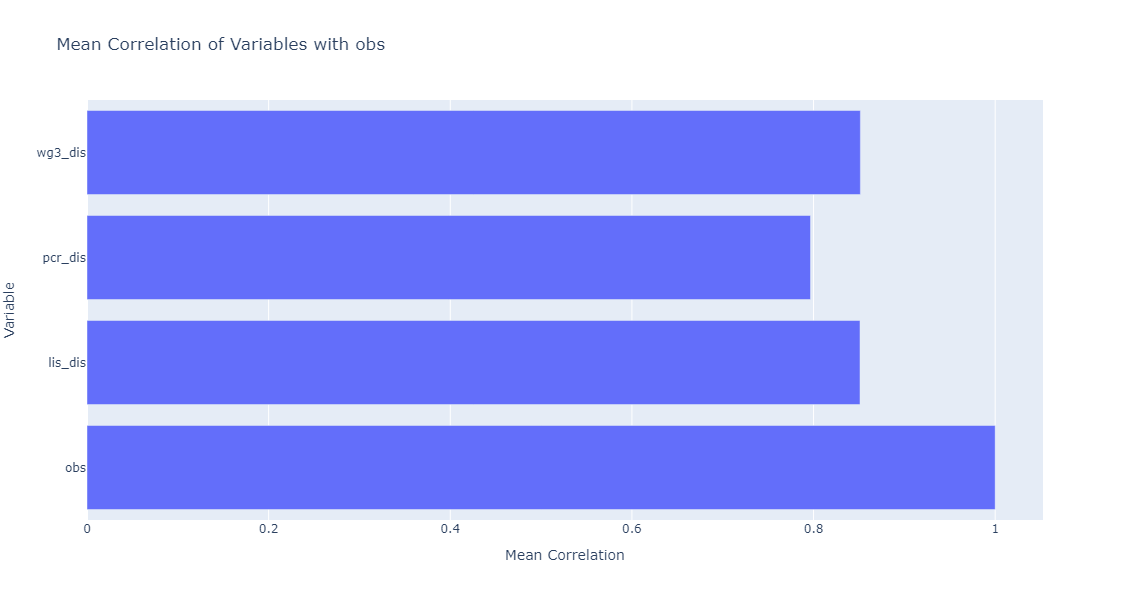

In [13]:
# Sort the DataFrame in descending order based on mean correlation
fig = px.bar(
    mean_correlation_df,
    x='Mean Correlation',
    y='Variable',
    orientation='h',
    title='Mean Correlation of Variables with obs',
    height=600,
    width=800,
)

fig.show()

In [15]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


correlations = {}

for file_name in os.listdir(folder_path):
    if file_name.startswith('allpredictors_') and file_name.endswith('.csv'):
        station_id = file_name.replace('allpredictors_', '').replace('.csv', '')
        file_path = os.path.join(folder_path, file_name)
        
        df = pd.read_csv(file_path, index_col='datetime')
        
        # Exclude the 'Unnamed: 0' column
        variables = df.columns[df.columns != 'Unnamed: 0']
        
        correlation_matrix = df[variables].corr()
        correlations[station_id] = correlation_matrix

combined_correlation_matrix = pd.concat(correlations.values(), keys=correlations.keys())     
combined_correlation_matrix = combined_correlation_matrix.reset_index()
df_matrix = combined_correlation_matrix.drop(['level_0'], axis=1)

mean_correlation = df_matrix.reset_index().groupby('level_1').mean()
mean_correlation = mean_correlation.drop(['index'], axis=1)

mean_correlation

,meteo_rain,meteo_tair,wg3_dis,wg3_RootMoist,wg3_SurfStor,wg3_SWE,lis_dis,lis_SurfMoist,lis_SWE,pcr_dis,pcr_SurfMoist,pcr_SurfStor,pcr_SWE,obs
level_1,,,,,,,,,,,,,,
lis_SWE,-0.238872,-0.470149,0.176487,0.379543,0.181070,0.931039,0.038579,0.330837,1.000000,0.076911,0.133050,0.048760,0.928257,0.137054
lis_SurfMoist,-0.123887,-0.714966,0.580115,0.908282,0.643794,0.283207,0.402084,1.000000,0.330837,0.459257,0.437241,0.380881,0.272942,0.527052
lis_dis,0.296797,-0.001519,0.797801,0.243298,0.739361,0.031843,1.000000,0.402084,0.038579,0.858673,0.335476,0.819167,0.037589,0.851141
meteo_rain,1.000000,0.322434,0.325480,-0.156286,0.249923,-0.238046,0.296797,-0.123887,-0.238872,0.343775,0.525789,0.329118,-0.224948,0.278783
meteo_tair,0.322434,1.000000,-0.328350,-0.865631,-0.288032,-0.428280,-0.001519,-0.714966,-0.470149,-0.058434,-0.424543,-0.019815,-0.409238,-0.224970
obs,0.278783,-0.224970,0.851544,0.437391,0.752966,0.115651,0.851141,0.527052,0.137054,0.796630,0.478880,0.748636,0.119286,1.000000
pcr_SWE,-0.224948,-0.409238,0.145415,0.314011,0.139879,0.992442,0.037589,0.272942,0.928257,0.073391,0.096428,0.059689,1.000000,0.119286
pcr_SurfMoist,0.525789,-0.424543,0.615369,0.539405,0.445144,0.096957,0.335476,0.437241,0.133050,0.425937,1.000000,0.393787,0.096428,0.478880
pcr_SurfStor,0.329118,-0.019815,0.734508,0.258927,0.654711,0.055268,0.819167,0.380881,0.048760,0.937483,0.393787,1.000000,0.059689,0.748636


In [18]:
grouped_correlation = mean_correlation.groupby(mean_correlation.columns, axis=1).mean()

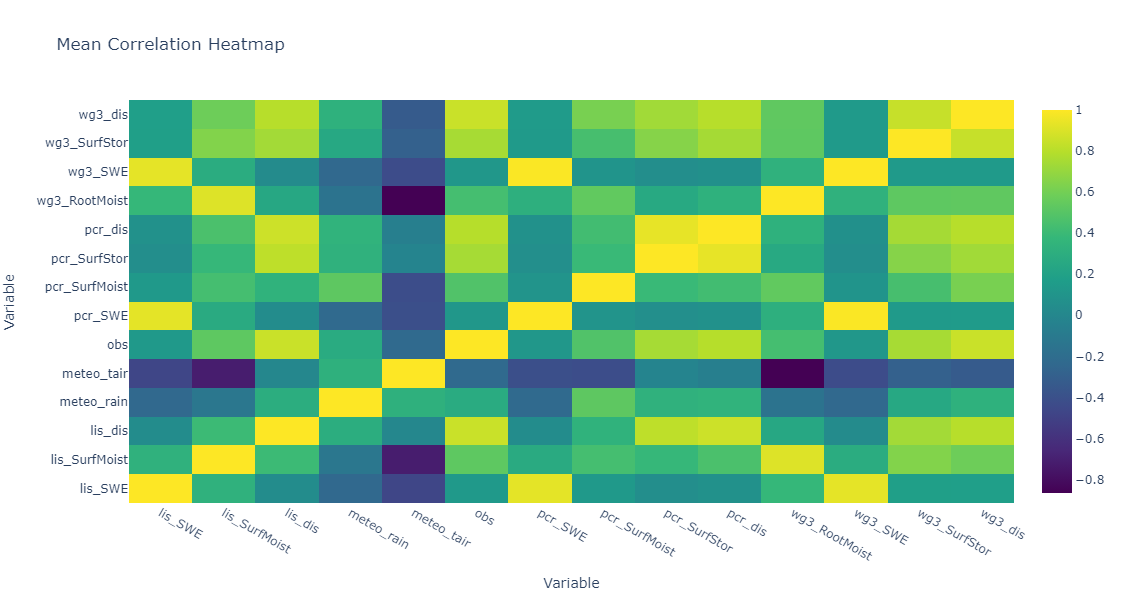

In [19]:
# Create heatmap figure
fig = go.Figure(data=go.Heatmap(
    z=grouped_correlation.values,
    x=grouped_correlation.columns,
    y=grouped_correlation.index,
    colorscale='Viridis'))

# Update layout
fig.update_layout(
    title='Mean Correlation Heatmap',
    xaxis=dict(title='Variable'),
    yaxis=dict(title='Variable'),
    width=800,
    height=600)

# Display the heatmap
fig.show()

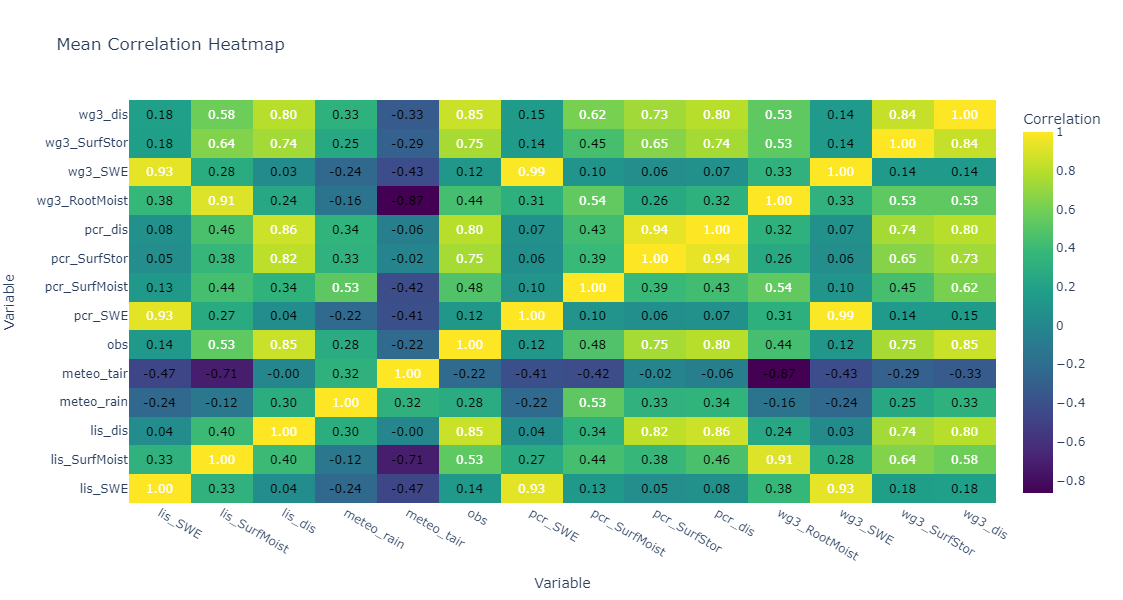

In [20]:
# Create heatmap figure
fig = go.Figure(data=go.Heatmap(
    z=grouped_correlation.values,
    x=grouped_correlation.columns,
    y=grouped_correlation.index,
    colorscale='Viridis',
    colorbar=dict(title='Correlation')))

# Add text annotations for correlation values
for i, row in enumerate(grouped_correlation.values):
    for j, value in enumerate(row):
        fig.add_annotation(
            x=grouped_correlation.columns[j],
            y=grouped_correlation.index[i],
            text=f'{value:.2f}',  # Format correlation value as a number with two decimal places
            showarrow=False,
            font=dict(color='white' if value > 0.5 else 'black'))  # Adjust font color based on value

# Update layout
fig.update_layout(
    title='Mean Correlation Heatmap',
    xaxis=dict(title='Variable'),
    yaxis=dict(title='Variable'),
    width=800,
    height=600)

# Display the heatmap
fig.show()


In [16]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Variable Correlations')
plt.show()

,Variable,Mean Correlation
wg3_dis,wg3_dis,0.515341
obs,obs,0.490717
pcr_dis,pcr_dis,0.489333
wg3_SurfStor,wg3_SurfStor,0.483781
lis_dis,lis_dis,0.460735
pcr_SurfStor,pcr_SurfStor,0.457223
lis_SurfMoist,lis_SurfMoist,0.384774
pcr_SurfMoist,pcr_SurfMoist,0.364209
wg3_RootMoist,wg3_RootMoist,0.340981
lis_SWE,lis_SWE,0.260898
